# Task 1/4 Principal Component Analysis Part 1

In this part, we will handle the data provided in `pca_dataset.txt`, and analyze it with PCA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we load the data from the file, and store the data as a numpy array.

In [2]:
X = np.loadtxt("pca_dataset.txt")

In [3]:
X.shape

(100, 2)

To get an intuitive feeling about the given raw data, we create a scatter plot.

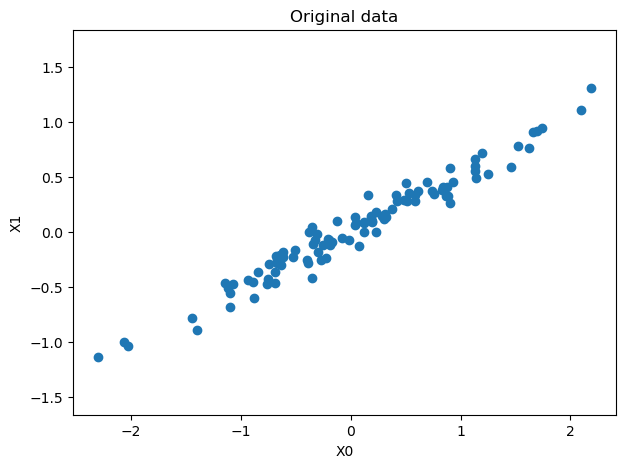

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_title('Original data')
plt.axis('equal')
plt.show()

We define a function to implement PCA analysis for data of any dimensionality.

In [5]:
def pca(data):
    """
    Process the raw data, and then perform SVD decomposition, return the decomposed arrays.

    Args:
        data: 2-d numpy array of shape (N, d);

    returns:
        U: left singular vectors, shape (N, N);
        S: singular values in descending order, shape (K,), where K = min(N, d);
        Vh: right singular values, shape (d, d);
    """
    # We first center the data
    data_tilde = data - data.mean(axis=0)
    U, S, Vh = np.linalg.svd(data_tilde)

    return U, S, Vh

Then we apply this function to the given data.

In [6]:
U, S, Vh = pca(X)

In [7]:
U.shape, S.shape, Vh.shape

((100, 100), (2,), (2, 2))

The new bases are given by the right singular vectors, and the energies/variances of the two components are given by the singular values.  
We take a look at the singular values.

In [8]:
S

array([9.94340494, 0.82624201])

As we can see, the first singular value is much larger than the second one, so we can discard the second one.  
In such way, the raw data can be approximated in a 1-d latent dimension.  
This 1-d linear subspace is spanned by the corresponding row vector of the `Vh`.

In [9]:
print(Vh[0])

[-0.88938337 -0.45716213]


Finally, as required, we add the directions of the two principal components by drawingterse lines starting from the center of the data set.

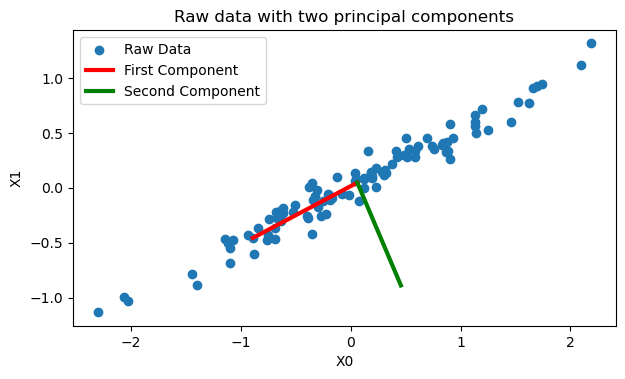

In [10]:
X_center = X.mean(axis=0)
first_component = np.vstack((X_center, Vh[0]))
second_component = np.vstack((X_center, Vh[1]))

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X[:, 0], X[:, 1], label='Raw Data')
ax.plot(first_component[:, 0], first_component[:, 1], label='First Component', color='red', linewidth=3)
ax.plot(second_component[:, 0], second_component[:, 1], label='Second Component', color='green', linewidth=3)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_title('Raw data with two principal components')
ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [11]:
S[0] / S.sum()

0.923280492599342